# Practica 1 - Preprocesamiento de datos y evaluación de modelos de clasificación/regresión.


## Minería de Datos 2017/2018 - Jacinto Arias y José A. Gámez

En esta práctica vamos a trabajar de manera introductoria algunos de los aspectos más importantes del proceso KDD como son:

* Almacenamieno y carga de datos
* Análisis exploratorio
* Preprocesamiento
* Selección de modelos y aprendizaje
* Evaluación de modelos

Aprenderemos a manipular y visualizar los datos mediante distintas funciones de la librería *pandas* y a implementar funciones de clasificación triviales como **zeroR** y **oneR**. Además probaremos la potencia de la librería *scikit-learn* utilizando **árboles de decisión**, pero no profundizaremos en ellos todavía.

El objetivo de la práctica será aprender a preparar y explorar nuestros datos, seleccinar y evaluar distintos modelos y ser capaces de **interpretar** los resultados obtenidos. Para ello utilizaremos una serie de problemas sintéticos y reales creados a propósito para tareas de evaluación y experimentación en Minería de Datos.

### Preliminares

In [1]:
# Always load all scipy stack packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

# Misc
import base64

In [2]:
# This code configures matplotlib for proper rendering
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

## 1 .- Representación, almacenamiento y acceso a los datos

Se trata de uno de los problemas críticos en cualquier una aplicación real de Minería de Datos (MD) ya que tendremos que tener en cuenta numerosos factores:
* ¿Dónde se generar los datos?
* ¿Con qué frecuencia?
* ¿Cuánto cuesta transmitirlos?
* ¿Dónde se van a almacenar?
* ¿Cuánto ocupan?, ¿Es seguro?, ¿Cuánto cuesta leerlos?
* ...

Además de añadir un alto grado de dificultad al proceso, las soluciones que aportemos suelen ser *ad hoc* para un problema concreto y por tanto es muy probable que tengamos que repetir gran parte del esfuerzo de proyecto a proyecto.

Es por ello que nosotros (así como muchos profesionales e investigadores en MD) trabajaremos en un entorno especialmente diseñado para experimentación, en el que gran parte del trabajo ya está realizado y los datos se encuentran procesados en un formáto legible y comodo en nuestra máquina (o en un servidor). Dichos datos nos servirán de banco de pruebas (*benchmark*) para evaluar desde nuestras técnicas de preprocesamiento hasta los modelos que construyamos.

Esto permitirá solucionar el problema desde un punto de vista análitico y dejar la integración tecnológica para más adelante.

### Datos no estructurados vs Datos estructurados

Ya sea en el campo de la estadística, o en el desarrollo de aplicaciones, los datos se diseñan a priori, y por tanto especificamos un formato concreto e incluso decidimos la tecnología a utilizar.

Es el caso claro de un arquitecto de software que diseña una base de datos para una aplicación, un desarrollador que implementa el *logger* de un programa o el administrador de sistemas que lo procesa después. Por ejemplo, el arquitecto decidirá utilizar SQL y comenzará a desarrollar un modelo entidad-relación que luego implementará, poblará y testará. En el segundo caso, el desarrollador formateará la salida de manera que pueda documentarlo y facilitar así su posterior análisis al *sysadmin*.

No obstante, con el creciente interés en la Minería de Datos, cada vez aparecen más casos de uso en los que los datos juegan un papel fundamental **muy distinto al de medio de transmision o de almacenamiento**. En estos casos los datos pasan a ser una parte central y fundamental del sistema, y no se diseñan de antemano, sino que se observan, se capturan del medio o se generan mediante procesos que no podemos controlar. En estos casos es necesario añadir a la ecuación metodologías para la captura de los datos y la extracción de la información relevante para convertirlos en resultados evaluables por las técnicas que vamos a aprender.

Este es un trabajo complejo que suele requerir una evolución contínua y consume gran parte del tiempo que dedicamos al desarrollo de sistemas basados en datos. 

Esta parte no la estudiaremos en la asignatura, así que asumiremos el rol del científico de datos al que el equipo de ingeniería le suministra los datos preparados para su análisis y estudio.

### El formato csv

Concretamente, haremos uso de uno de los formatos más sencillos y expresivos de datos estructurados que existen: **csv**.

Un fichero csv es un fichero de texto plano donde los datos se almacenan a modo de matriz en la que cada fila empieza en una nueva línea, y cada valor está separado por comas (de ahí el nombre *"Coma Separarated Values"*). Al ser ficheros de texto plano, podéis editarlos con la herramienta que prefiráis (notepad, gedit, vim...), por convención es recomendable que los guardéis con extensión `.csv` en  lugar de `.txt`.

De manera adicional a los datos, es muy común incluir una primera fila de cabecera, donde indicaremos el nombre de cada columna.

En la página de campus virtual tenéis a vuestra disposición los distintos ficheros de datos que usaremos durante el curso. Podéis descargarlos y no os olvidéis de colocarlos en un lugar visible para jupyter dentro de la carpeta compartida con el contenedor de docker. En los ejemplos de la libreta usaremos la ruta `./data/` así que no os olvidéis de cambiarla en el caso de haber elegido una diferente para vuestros datos.

### El conjunto de datos Iris

El conjunto de datos (dataset) Iris, es un ejemplo muy popular en estadística introducido por Fisher en 1936. Se trata de un ejemplo muy utilizado en este campo y que ha trascendido también como uno de los ejemplos estandar en Minería de Datos debido a sus propiedades estadísticas que lo hacen muy visual.

Consiste en 150 muestras tomadas para tres especies de flores distintas, sobre las que se han realizado diversas mediciones: El ancho y largo de los pétalos y el sépalo. El objetivo del problema sería el de clasificar una nueva instancia, cuya especie es desconocida, en función de sus propiedades.

Podéis encontrar este dataset en campus virtual como `iris.csv`

Antes de empezar sería una buena idea abrir el fichero en un editor de texto para ver su contenido.

### Cargando ficheros .csv en pandas

Podemos cargar un fichero csv en pandas como un `DataFrame` utilizando la funcion `read_csv`. Es recomendable acudir a la documentación de esta función para conocer sus parámetros y saber los detalles de su funcionamiento [[Enlace]](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [3]:
# Please update your data path accordingly
df = pd.read_csv("../data/iris.csv", dtype={ "label": 'category'})


Una vez cargado el dataset es fundamental comprobar que el proceso ha funcionado sin problemas, para ello podemos escoger una fila al azar, o mostrar las primeras filas del dataset y comprobar que las variables y los valores están dentro de lo esperado.

Para ello podemos usar la función `head` que obtiene las primeras filas del dataset. La documentación de esta función contiene información relevante para su uso [[Enlace]](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)

**NOTA: Esta será la última vez que dirija a los alumnos a la documentación de una función del stack scipy. Es muy recomendable que comprobéis todas las funciones que se presenten, para estar seguros de su uso y de las implicaciones que puedan tener.** Moraleja: Copiar y pegar es muy muy peligroso!!!

In [4]:
# We can show the first rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`head` es muy útil para comprobaciones rápidas, pero no hay que olvidar que las **instancias** siempre serán las primeras en orden consecutivo. Esto puede ser un problema si queremos hacer alguna comprobación estadística, ya que **la muestra estará sesgada**. Para evitar este problema también podemos obtener una muestra aleatoria del dataset con `sample`.

---
**Palabras clave!!**. 

* Es muy común referirse a las filas como como **instancias**, **casos** o **ejemplos** dentro de nuestro problema.
* Una muestra **sesgada** es aquella que hemos obtenido sin la aleatoriedad suficiente para que sea representativa del dataset entero.
---

In [5]:
# We can retrieve a random sample from the dataframe
df.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,label
1,4.9,3.0,1.4,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
138,6.0,3.0,4.8,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
93,5.0,2.3,3.3,1.0,versicolor
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
6,4.6,3.4,1.4,0.3,setosa


---
## 2 .- Análisis exploratorio

Antes de empezar con el preprocesamiento es interesante observar las propiedades del dataset, analizando sus variables y la interacción entre las mismas. Para ello  no podemos usar el formato tabular directamente ya que para un humano sería casi imposible extraer una conclusión a partir de mirar valores numéricos (imaginad un dataset de varios millones de instancias), así que nos apoyaremos en gráficas y estadísticos.

### Conociendo el dataset

Antes de realizar cualquier operación es fundamental conocer nuestro problema. Para ello es necesario explorar las dos dimensiones básicas de un data frame:

* Número de casos
* Número de variables
    * Tipo de las variables: **contínua/discreta**
    * **Distribución** de las variables/número y **frecuencia** de **estados**
        
Para ello consultaremos la estructura de datos utilizando las funciones correspondientes.

---
**Palabras clave!!**

* Una variable **contínua** es aquella que se representa mediante valores numéricos que se **distribuyen** deacuerdo a una función.
* Una variable **discreta** es aquella compuesta por un conjunto finito de valores denominados **estados** a los que comumente se les puede asignar un valor semántico y que se distribuyen deacuerdo a una función probabilística que determina su **frecuencia**
---

In [6]:
# Number of cases is just the length of the dataframe
print( len(df) )
print( df.shape )
print( df.size )

150
(150, 5)
750


In [7]:
# To get additional info about a variable we can just invoke info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null category
dtypes: category(1), float64(4)
memory usage: 4.9 KB


In [8]:
# We can inspect categorical variables:
df.label.cat.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

### Visualizando las variables

Iris tiene 4 atributos predictores numéricos, y una clase multivariada de tres estados. Lo primero que debemos hacer es representar y analizar las distribuciones de dichas variables. Para ello utilizaremos un **histograma** en el caso de las variables numéricas y un **diagrama de barras** (barplot) para las variables discretas. Este tipo de visualizaciones en las que solo se estudia una variable se denominan **univariadas**.

** Palabra clave!!** Un método de análisis **univariado** es aquel que solo involucra a una única variable.

**!! NOTA:** El código de las gráficas no es obligatorio entenderlo, la generación de gráficas de manera manual no es un requisito evaluable en esta signatura, tan solo regenerarlas a partir del código que se os proporciona **y ser capaz de interpretarlas**. No obstante si alguien quiere aprender (y mejorar sus trabajos), la librería `seaborn` no es muy complicada, aquí tenéis un tutorial [[Enlace]](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html). Además hay muchos recursos en internet, y podéis preguntar en el foro cualquier duda.

Como comprobaréis a continuación la gráfica está encapsulada en una función que podéis ejecutar una vez en toda la libreta y reutilizar siempre que queráis. En campus virtual podéis encontrar un anexo con una serie de gráficas adicionales que podéis utilizar.

#### Gráfica - Visualización histograma-densidad de todas las variables de un dataset

In [9]:
def gMultipleHistogram(targetdf):
    # First we remove the class variable
    target_noclass = targetdf.drop('label', 1)
    # Now we generate the multiple histogram
    g = sns.FacetGrid(pd.melt(target_noclass), col="variable", sharey=False, sharex=False, col_wrap=2)
    g.map(sns.distplot, "value");    


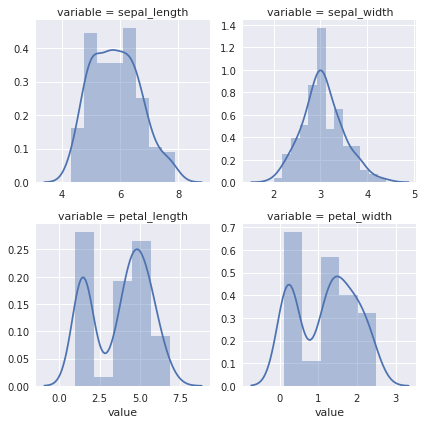

In [10]:
gMultipleHistogram(df)

En un histograma podemos ver la densidad de ejemplos para los distintos valores de una variable particular, en este caso podemos ver que las variables `sepal_length`y `sepal_width` muestran distribuciones con tendencia central en forma de campana, mientras que las otras dos muestran distribuciones algo más complejas. Lo que también podemos observar es que todos los valores se comportan de manera parecida, sin que podamos observar valores **anómalos** o **ruidosos**.

La visualización de un histograma es muy útil ya que podemos intuair a priori distribuciones conocidas como la gaussiana, algo que es muy útil a la hora de interpretar las variables del problema.

Un histograma no deja de ser una **discretización** sobre una variable contínua. Si lo que queremos analizar es una variable discreta, entonces nos bastará con representar la frecuencia de cada estado con una columna en un diagrama de barras.

---
** Palabras clave **

* Un dato **anómalo** o **ruidoso**, también denominado **outlier**, es aquel que se aleja de la distribución de la variable.
* **Discretizamos** una variable numérica al transformarla en una variable discreta al determinar intervalos en todo su dominio que asociamos a estados de la nueva variable.
---

#### Gráfica - Visualización diagrama de barras para una variable

In [11]:
# Prints a barplot for the selected variable on the df
def gSingleBarplot(targetDf, targetVar):
    sns.countplot(data=targetDf, x=targetVar)

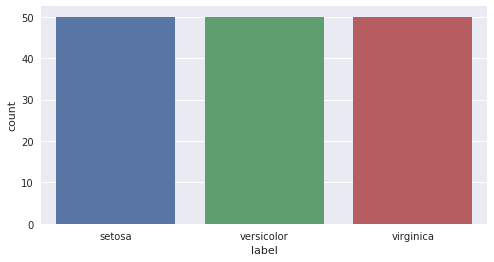

In [12]:
gSingleBarplot(df, "label")

Sin mucho misterio, observamos que las tres clases tienen el mismo número de casos. A esto se le llama un problema **balanceado**.

---
**Palabra clave**: Una muestra está balanceada con respecto a un conjunto de variables cuando las frecuencias de las distintas combinaciones de estados de las mismas aparecen en la misma proporción

---

El análisis univariado nos permite identificar problemas en las variables tales como ruido, outliers así como detectar distribuciones carentes de información como por ejemplo distribuciones uniformes en las que cada valor es prácticamente único (como por ejemplo el identificador de una fila).

No obstante la mayoría de la información relevante que podemos extraer de un dataset proviene de estadísticos que se obtienen al contrastar variables variables entre si (método **multivariado**). En el caso de un problema de clasificación en el que pretendemos determinar la potencia **discriminativa** de un conjunto de atributos, solemos condicionar las relaciones entre ellos con respecto a la información que aportan sobre la variable clase.

---
**Palabra clave**: Un análisis **multivariado** es aquel que involucra a varias variables del problema.

---

Como caso particular, podemos estudiar relaciones entre dos variables. Para ello crearemos una matrix de gráficos del tipo nube puntos o **scatterplot** en el que cada punto correspondera con un caso de la base de datos y en cada eje representaremos un atributo predictor. La información de la variable clase la representamos coloreando cada instancia acorde a la clase a la que pertenece.

#### Gráfica - Separabilidad de la clase entre atributos predictores

In [13]:
def gPairPlot(targetDf):
    sns.pairplot(targetDf, hue="label");

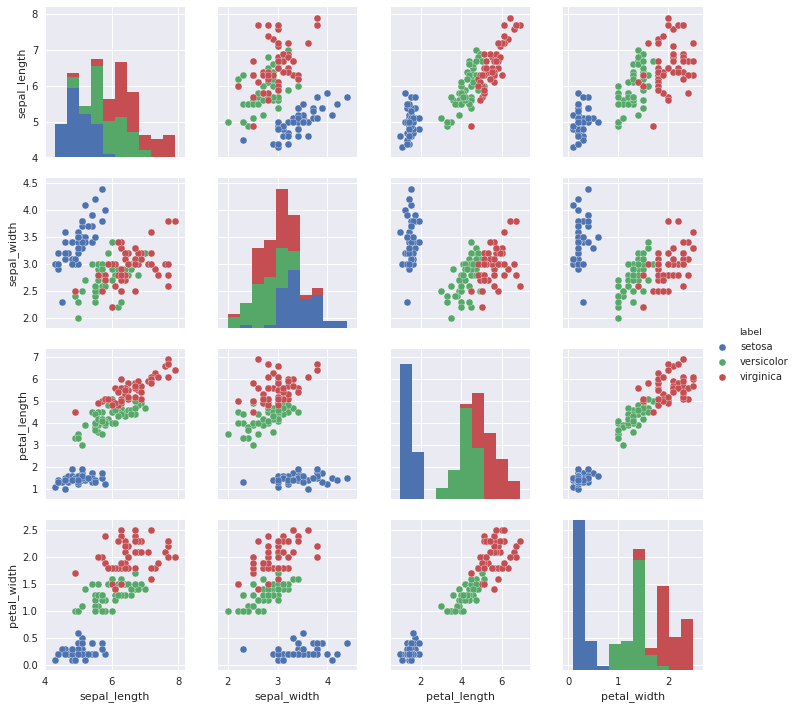

In [14]:
gPairPlot(df)

Como podéis observar, este gráfico muestra una gran cantidad de información relevante para nuestra tarea de clasificación, mostrando el poder discriminativo de cada attributo y para cada combinación de ellos. Por suerte, el dataser iris fue creado con una finalidad didáctica y por ello la tarea de clasificación es muy sencilla y visual. No tendremos la misma suerte con otros datasets no artificiales, ya que en el mundo real los resultados serán mucho más ruidosos y aparentemente aleatorios.

Analizad detenidamente el gráfico e intenta contestar a las siguientes preguntas:
* ¿Existe algún atributo que separe perfectamente la clase?
* ¿Cómo implementarias una función de clasificación trivial para estos datos?
* Puedes observar algún tipo de relación entre las variables?
* Crees que las relaciones entre las variables aportan algo de información?
* ¿Cómo aprovecharías esta información?


#### Conclusión:
Como ya hemos anticipado, este análisis tan visual no podremos reproducirlo para otros datos reales, pero es un buen ejercicio didáctico. Existen también otros tipos de gráficos que son de mucha utilidad para analizar otras propiedades de las distribuciones de nuestros atributos predictores, especialmente en los casos donde encontremos mucho ruido, anomalías o valores pedidos; los veremos más adelante.

Otro punto negativo a la hora de realizar este análisis exploratorio de manera únicamente gráfica es la **dimensionalidad** de nuestros datos. En el caso de iris resulta sencillo dado que solo disponemos de 4 atributos. No obstante, en casos reales podemos encontrarnos datasets con decenas, cientos e incluso miles de variables, lo que haría imposible visualizar todas ellas.

¿Cuántas gráficas generaría el caso anterior para un dataset con 50 variables?

---
**Palabra clave**: La **dimensonalidad** es una referencia a su tamaño, generalmente respecto al número de variables.

---

In [15]:
50 * 50

2500

¿Crees que es una buena práctica analizar tal cantidad de gráficos a mano?

La respuesta es no. El análisis visual se realiza en momentos puntuales y para variables concretas una vez que hemos limpiado y analizado nuestros datos. Para empezar, es normal utilizar técnicas de estadística que nos permitan analizar numéricamente los atributos. Pandas es una muy buena herramienta para analizar automáticamente nuestras variables. ¿recordáis?

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---
## 3 .- Clasificadores triviales zeroR y oneR

Antes de empezar a trabajar con clasificadores más potentes de la librería **scikit-learn** vamos a implementar nuestros propios clasificadores utilizando directamente nuestros datos y pandas.

### Clasificador ZeroR

El clasificador **zeroR** es el clasificador más trivial de todos. Básicamente consiste en una función que asigna siempre a los nuevos casos la clase predominante. Este clasificador es inútil en la mayoría de los casos, pero nos servirá como evaluación inicial o **baseline** a la hora de evaluar la dificultad de un dataset concreto o la efectivadad de un modelo.

---
**Palabra clave**: Nos referimos como **baseline** a un valor trivial en el resultado de la clasificación, un punto de partida que puede alcanzarse mediante la observación directa de los datos.

---

Vamos a implementar de manera manual un clasificador zeroR para la base de datos iris. En este caso, la decisión sera arbritaria ya que como bien sabemos no existe una clase predominante en nuestro dataset. Implementaremos un clasificador como una función que crea una nueva columna en nuestro dataset llamada `prediction` indicando la clase que asigna dicho clasificador a la instancia correspondiente.

In [17]:
# We can create new columns in a dataset by ussing assign

# The new variable can be a fixed escalar expression or a mutation of other variables

# This test just sums up two variables
prueba1 = df.assign( nuevaCol = df.sepal_length + df.petal_length )
print(prueba1.head(), "\n")

# In this case we create a boolean value by comparing two variables
prueba2 = df.assign( nuevaCol = df.sepal_length >= 5.0 )
print(prueba2.head(), "\n")

   sepal_length  sepal_width  petal_length  petal_width   label  nuevaCol
0           5.1          3.5           1.4          0.2  setosa       6.5
1           4.9          3.0           1.4          0.2  setosa       6.3
2           4.7          3.2           1.3          0.2  setosa       6.0
3           4.6          3.1           1.5          0.2  setosa       6.1
4           5.0          3.6           1.4          0.2  setosa       6.4 

   sepal_length  sepal_width  petal_length  petal_width   label  nuevaCol
0           5.1          3.5           1.4          0.2  setosa      True
1           4.9          3.0           1.4          0.2  setosa     False
2           4.7          3.2           1.3          0.2  setosa     False
3           4.6          3.1           1.5          0.2  setosa     False
4           5.0          3.6           1.4          0.2  setosa      True 



A continuación crearemos una función que, dado un dataframe, clasifique las instancias. Para ello utilizaremos un par de técnicas de programación en python de estilo *declarativo* que nos harán la vida mucho más sencilla.

In [39]:
# PYTHON ASIDE (higher order functions):

# Just remember that python functions are just plain objects, that could be passed or 
# returned as usual

# For example this function creates a function that sums n to a number
def factorySumN( n ):
    def sumN(a):
        return a+n
    return sumN

# Usaje is plain simple:
sum3 = factorySumN(3)
print( sum3(5) )

sum10 = factorySumN(10)
print( sum10(5) )

8
15


Ahora utilizaremos esta técnica para crear un clasificador:

Una función `classifier` será una función que dado un dataset `data` cree una nueva columna llamada `prediction` asignando, para cada instancia, el valor de la variable clase más probable conforme a los atributos.

La función `trainZeroR`deberá, a partir de un dataset de entrada `trainingData`, aprender los parámetros (¿cuál es la clase más probable?) y devolver una función que asigne siempre la clase más probable a las instancias.

### Implementación clasificador ZeroR

In [40]:
# Complete the missing code in ???

# This is the outer function that should return the classifier function
def trainZeroR(trainingData):
    # We first learn the parameters, aka, the most probable class
    # Tip! get the class variable mode and take the first value
    majorClass = trainingData.label.mode()[0] # <-- COMPLETE
    
    # Now we create and return the classifier function
    def classifier( data ):
        return data.assign( prediction = majorClass ) # <-- COMPLETE
    
    return classifier

De una forma tan sencilla acabais de programar vuestro primer clasificador. Ahora vamos a probarlo en el dataset iris. De momento vamos a entrenar el clasificador con todos los datos que tenemos, y luego clasificaremos estos mismos datos. En este caso podemos decir que estamos **entrenando** y **evaluando** el modelo con los **datos de entrenamiento**.

---
**Palabras clave**: 

**Entrenar o aprender** un modelo consiste en a partir de un dataset denominado **conjunto de entrenamiento** ajustamos los parámetros de dicho modelo para optimizar la clasificación con respecto a la información contenida en el dataset de entrenamiento.

**Validar** un modelo consiste en clasificar un conjunto de datos conmunmente denominado **contunto de test** y obtener métricas de rendimiento conforme a los resultados

---

In [41]:
# First we train the classifier
zeroRclassifier = trainZeroR(df)

# Now we predict the labels using the same dataset
df_predicted = zeroRclassifier(df)

# Now we check the resulting dataset
df_predicted.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,label,prediction
121,5.6,2.8,4.9,2.0,virginica,setosa
108,6.7,2.5,5.8,1.8,virginica,setosa
32,5.2,4.1,1.5,0.1,setosa,setosa
93,5.0,2.3,3.3,1.0,versicolor,setosa
70,5.9,3.2,4.8,1.8,versicolor,setosa


Como podemos ver el clasificador está asignando la clase más probable (en este caso por desempate) a todas las instancias. ¿No es difícil adivinar cual será la tasa de acierto del clasificador verdad?

Para calcular este valor podemos crear una matriz de confusión entre las columnas label y perdiction de nuestro nuevo dataset. Para ello utilizaremos:

In [42]:
pd.crosstab(df_predicted['label'], df_predicted['prediction'])

prediction,setosa
label,
setosa,50
versicolor,50
virginica,50


---
**PREGUNTA** ¿Qué le ocurre a esta matrix de confusión, dónde esta el problema?

In [43]:
# Run me to know the answer (b64 encoded quizes FTW!)
base64.b64decode('TGEgbWF0cml4IGRlIGNvbmZ1c2lvbiBlc3RhIGluY29tcGxldGEgcG9ycXVlIG5vIGhheSBpbnN0YW5jaWFzIGNsYXNpZmljYWRhcyBjb21vIHZlcnNpY29sb3IgbyB2aXJnaW5pY2EuIFBvZGVtb3MgYXN1bWlyIHF1ZSBsYXMgZG9zIGNvbHVtbmFzIHF1ZSBmYWx0YW4gc29uIHRvZG9zIGNlcm9zLg==')

b'La matrix de confusion esta incompleta porque no hay instancias clasificadas como versicolor o virginica. Podemos asumir que las dos columnas que faltan son todos ceros.'

A partir de este resultado de clasificación podemos calcular otras métricas importantes que nos ayuden a determinar si el proceso ha sido correcto. De entre ellas, la más importante es el **accuracy**.

Para ello simplemente podemos comparar las columnas `label` y `prediction` y obtener la proporción de casos en las que coinciden.

In [44]:
# Primero comparamos ambas comlumnas:
comparison = df_predicted[df_predicted['label'] == df_predicted['prediction'] ]

# TP: Contamos los aciertos:
accuracy = len(comparison) / len(df_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


Justo lo que esperábamos, ¿no?. 

Puede parecer que utilizar el clasificador ZeroR es inútil, pero como veremos más adelante hay problemas en los que puede ayudarnos a identificar si otras técnicas obtienen resultados relevantes.

### Clasificador OneR

Con una filosfía similar a la de su homónimo más sencillo pero aportando potencia discriminativa real, el clasificador **OneR** identifica una partición potencial en el dataset que nos permita separar la clase lo mejor posible. Para ello identificará el atributo predictor más relevante, determinando la potencia discriminativa para distintos intervalos, en el caso de una variable contínua, o para cada estado en el caso discreto.

Para poder implementar este clasificador, necesitaremos primero diseñar un algoritmo que nos permita determinar la potencia discriminativa de cada atributo. Como trabajamos con atributos numéricos implementaremos una técnica sencilla que primero discretizará en intervalos el atributo y luego calculará para las particiones obtenidas el error de clasificación. Concretamente seguiremos un enfoque en el que **discretizaremos de manera no supervisada**.

Antes de empezar vuelve a mirar la última gráfica que generamos...

¿Podrías imaginar una partición manualmente para los atributos que clasificase bien?

----------------------------------------------------------------

Nuestra primera aproximación utilizará un enfoque de discretización por **igual anchura**. Para ello buscaremos el atributo que, una vez discretizado, nos ofrezca una mejor separación de la clase.

#### Discretizando

Para discretizar por igual anchura podemos utilizar la funcion `pd.cut(...)` [[Doc]](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

```
pd.cut(
x : Array o variable,
bins: Numero de bins a utilizar
retbins: Poner a true para que devuelva una tupla
...
)
```

La función devuelve una tupla con la nueva variable y los bins generados:

In [45]:
# Usage example:
(attribute, bins) = pd.cut(df['sepal_length'], bins=3, retbins=True)

# This prints the new dataset, each value is now represented by an interval
attribute.sample(10)

78       (5.5, 6.7]
63       (5.5, 6.7]
82       (5.5, 6.7]
86       (5.5, 6.7]
133      (5.5, 6.7]
112      (6.7, 7.9]
96       (5.5, 6.7]
18       (5.5, 6.7]
35     (4.296, 5.5]
51       (5.5, 6.7]
Name: sepal_length, dtype: category
Categories (3, interval[float64]): [(4.296, 5.5] < (5.5, 6.7] < (6.7, 7.9]]

In [46]:
# This prints the resulting intervals
bins

array([ 4.2964,  5.5   ,  6.7   ,  7.9   ])

In [47]:
# It is important to remove the first and the last bin, as we likely want to consider -infinite and infinite as our edges
bins[1:-1]

array([ 5.5,  6.7])

------------------------------------------------------------------------------------------------
#### Prueba con un atributo:

Vamos a probar a discretizar en 3 bins el atributo `sepal_length`:

In [48]:
# Discretizing as before
(attribute, bins) = pd.cut(df['sepal_length'], bins=3, retbins=True)

Ahora vamos a comprobar cómo de bien clasificaria esta partición del atributo por separado. Para ello vamos a crear una matriz indicando la distribución de cada clase respecto a cada intervalo.

In [49]:
tab = pd.crosstab(attribute, df['label'])
tab

label,setosa,versicolor,virginica
sepal_length,,,
"(4.296, 5.5]",47,11,1
"(5.5, 6.7]",3,36,32
"(6.7, 7.9]",0,3,17


Para clasificar, asignaríamos a cada partición la clase mayoritaria, por lo que escogeríamos el valor máximo para cada fila. Según esta matriz podemos ver que la primera partición `(4.296, 5.5]` identificada muy bien la variable **setosa**, con muy poco error con respecto a las otras dos, y lo mismo para la tercera partición con respecto a la variable **virginica**.

No obstante, la segunda partición `(5.5, 6.7]` estaría introduciendo mucho error, puesto que no hay mucha diferencia entre la clase mayoritaria **versicolor** y la clase **virginica**, por lo que todos los ejemplos de la segunda serían clasificados erroneamente.

Una buena medida para evaluar esta partición sería la suma de todos los ejemplos que serían mal clasificados conforme a las particiones, es decir:

In [50]:
11+1+3+32+0+3

50

También podemos calcularlo a partir de la tabla programáticamente. Podríamos usar un bucle... pero la notación vectorial de numpy es mucho más concisa.

La siguiente operación computa el mismo resultado iterando por filas, sumando todos los valores y restando el maximo. Luego devolvemos la suma de la lista resultante. Si te cuesta entender el resultado prueba a separar cada operación en una línea diferente y asignará a una variable.

In [51]:
sum( [ sum(f) - max(f) for f in tab.values ] )

50

Para determinar cual es el valor de la clase mayoritaria en cada fila, podemos usar notación de comprensión de listas, mirar la tabla y quedarnos con el índice máximo. `tab.values` devuelve las filas de la tabla, de cada fila extraemos el índice máximo con `argmax`y luego obtenemos el nombre del estado correspondiente de la clase consultado el nombre de la columna correspondiente a dicho índice con `tab.columns`.

In [52]:
[ tab.columns[f.argmax()] for f in tab.values ]

['setosa', 'versicolor', 'virginica']

**Probad a cambiar el código anterior para analizar otro atributo diferente**
¿La partición que genera es mejor o peor?, ¿concuerda con la gráfica anterior?

---------
Ahora implementamos el clasificador siguiendo la misma filosofia que usamos para ZeroR:
Creamos una función de entrenamiento que dado unos datos de entrada genere una función de clasificación.

Este clasificador dispone de un **hyperparámetro**, `nbins`, que condiciona el número de bins por el que se aplica el algoritmo de discretización. Un valor recomendado podría ser fijarlo al número de clases presentes en el problema.

---
**Palabra clave**: Un **hyperparametro** es un parámetro del algoritmo de aprendizaje, que condiciona de algún modo cómo se inducirán los parámetros del modelo respecto a los datos y por ello influirá en su valor final. Cuantos más hyperparámetros tenga un modelo mayor complejidad tendrá pero también será más difícil de configurar a la hora de entrenarlo.


### Implementación clasificador OneR

In [53]:
# Complete the code when indicated with ???

# Outer learning function, hyperparameter nbins=1 is equivalent to zeroR if all attributes are continuous
def trainOneR(trainingData, nbins = 1, debug = True):
    # Debug: 
    if debug:
        print("-----------------------------------")
        print("Training OneR")
        print("-----------------------------------")
        print("attribute\terror")
    # ------------------------------------

    # Loop maximization variables
    best_attribute = ''
    best_partitions = []
    best_classes = []
    best_error =  float("inf")

    # We discretize each attribute and compute its error
    for att in trainingData.columns.values: 
        # We must ignore the class variable
        if att == 'label': continue

        # First we generate the partitions
        (attribute, bins) = pd.cut(trainingData[att], bins=nbins, retbins=True)

        # The we must compute the error
        tab = pd.crosstab(attribute, trainingData['label'])
        error = sum( [ sum(f) - max(f) for f in tab.values ] )

        # We can show each variable individual error
        if debug:
            print(att, "\t", error)
        # ----------------------------------------
        
        # Lastly we compare if this attribute is better than the previous local optima
        if (error < best_error):
            # If that is the case we store it as the current local optima
            best_attribute  = att
            best_partitions = bins[1:-1]
            # We must store the majority class for each interval in order to assign it
            # during classification
            best_classes = [ tab.columns[f.argmax()] for f in tab.values ]
            best_error = error

    # Now we generate the classifier function regarding the previous parameters
    def classifier( testData ):
        # It simply assigns the majority class for each interval
        # For that we can use an auxiliar function to check which interval the current value
        # for the optimal attribute belongs to and assign the stored majority class
        def assignClass( attValue ):
            for i in range(nbins):
                if i != nbins - 1:
                    if attValue <= best_partitions[i]:
                        return best_classes[i]
                else:
                    if attValue > best_partitions[i - 1]:
                        return best_classes[i]

        # Now we apply the previous function to all the instances in the dataset
        # Remember that when using map in python3 we must cast the result as list
        prediction = list(map( assignClass, testData[best_attribute] ))

        return testData.assign( prediction = prediction )
    
    print("-----------------------------------")
    return classifier

**Una vez que estéis seguros de que entendéis bien todo el código**
Podemos usar el algoritmo de manera análoga a como usamos en su momento ZeroR

In [54]:

# Train the classifier
oneRclassifier = trainOneR(df, nbins=len(df.label.unique()))

# Classify some instances
df_predicted = oneRclassifier(df)

# Check the result
df_predicted.sample(5)


-----------------------------------
Training OneR
-----------------------------------
attribute	error
sepal_length 	 50
sepal_width 	 74
petal_length 	 8
petal_width 	 6
-----------------------------------


,sepal_length,sepal_width,petal_length,petal_width,label,prediction
31,5.4,3.4,1.5,0.4,setosa,setosa
113,5.7,2.5,5.0,2.0,virginica,virginica
104,6.5,3.0,5.8,2.2,virginica,virginica
143,6.8,3.2,5.9,2.3,virginica,virginica
8,4.4,2.9,1.4,0.2,setosa,setosa


#### De igual modo, vamos a calcular el error de clasificación
como podréis comprobar, es equivalente al calculado durante el aprendizaje para el mejor atributo

In [55]:
pd.crosstab(df_predicted['label'], df_predicted['prediction'])

prediction,setosa,versicolor,virginica
label,,,
setosa,50,0,0
versicolor,0,49,1
virginica,0,5,45


Repetimos ahora el cómputo de la tasa de acierto (accuracy), donde observamos que es mucho más alta que en el caso de ZeroR, tal y como esperábamos.

**NOTA! He incluido una prueba en el código anterior, comparando el resultado obtenido con el que obtiene la implementación correcta. Si obteneis este error volved y comprobar vuestra implementación ya que es probable que tengáis un bug!**

In [56]:
# Primero comparamos ambas comlumnas:
comparison = df_predicted[df_predicted['label'] == df_predicted['prediction'] ]

# TP: Contamos los aciertos:
accuracy = len(comparison) / len(df_predicted)
print("Accuracy:", accuracy)

assert accuracy == 0.96, "ERROR! el accuracy obtenido no se corresponde con el de la implementación correcta (0.96) para este dataset. Volved al códido y arreglad los errores"

Accuracy: 0.96


---
## 4 .- Evaluación de modelos: Holdout

Hasta ahora hemos estado trabajando con todo el conjunto de datos conforme lo hemos cargado desde el fichero. Esto se considera una muy **mala práctica** ya que todas las decisiones que tomemos, incluido el análisis exploratorio estarán **sobreajustadas** y serán de mala calidad al no corresponderse con el mundo real.

---
**Palabra clave** Decimos que un modelo está **sobreajustado** cuando sus parámetros se han aprendido de manera que intentan reproducir perfectamente los datos de entrenamiento, de los que conocemos su resultado. Este sobreentrenamiento (**overfitting**) implica que al modelo le costará más discriminar nuevos casos que presenten datos que nunca han sido observados, presentando un mayor nivel de error en su uso en en el mundo real. Cuando un clasificador se aprende de manera que se elimina el overffiting se dice que **generaliza**.

---

Desde el primer momento, es fundamental separar nuestro conjunto de datos como mínimo en dos: Una muestra de **entrenamiento** y una muestra de **testeo**, un proceso conocido como **holdout**. De este modo, podemos dejar el conjunto de testeo aparte a modo de instancias no observadas, para asegurarnos que los resultados de validación no están sobreajustados y que generalizan correctamente a nuevos datos.

Una vez en pandas, podemos aplicar un holdout partiendo directamente el dataset, para ello podemos usar la función de indexado:

In [57]:

# Supose a percentaje of training/test data
trainingSize = 0.6

# Compute the partition size
# It is very important to use ceil to round the number to the next integer number!!
from math import ceil
cutIndex = ceil(len(df) * trainingSize)

# We divide the dataset into two subsets by index:
irisTraining = df.iloc[0:cutIndex]
irisTest = df.iloc[cutIndex:]

# Check the sizes to assure we are using all the instances:
print(len(df))
print(len(irisTraining))
print(len(irisTest))

150
90
60


Ahora es el momento de entrenar de nuevo ambos clasificadores y comprobar el resultado. Comenzaremos con el clasificador **ZeroR**, recordad que ahora entrenaremos con el tranining y evaluaremos con el test:

In [58]:
zeroRclassifier = trainZeroR(irisTraining)
df_predicted = zeroRclassifier(irisTest)
pd.crosstab(df_predicted['label'], df_predicted['prediction'])

prediction,setosa
label,
setosa,0
versicolor,10
virginica,50


In [59]:
comparison = df_predicted[df_predicted['label'] == df_predicted['prediction'] ]
accuracy = len(comparison) / len(df_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.0


---
Hemos obtenido un resultado mucho peor que en el caso anterior. ¿Qué ha pasado?, antes de seguir investigando probemos con el clasificador **OneR**

--------

---
#### **Un pequeño intermedio : Principio DRY! (Dont repeat yourself)** 
Como podéis observar, hemos repetido un código que ya habíamos escrito anteriormente para evaluar nuestro clasificador. Esto es una práctica muy negativa y que solemos repetir mucho en entornos de experimentación como Jupyter. El principio dry nos impone que no podemos NUNCA repetir nuestro código, y nos obliga a definir funciones reusables.

Podríamos encapsular el código anterior dentro de una función genérica que nos permita invocar cualquier clasificador.

In [60]:
# The star notated argument are cale varargs, and can be passed to inner functions
def trainAndEvalClassifier(classifier, trainingDf, testDf, **kwargs):
    model = classifier(trainingDf, **kwargs)
    predictedDf = model(testDf)
    tab = pd.crosstab(predictedDf['label'], predictedDf['prediction'])
    comparison = predictedDf[predictedDf['label'] == predictedDf['prediction'] ]
    accuracy = len(comparison) / len(predictedDf)
    return (tab, accuracy)

Así usaríamos la función anterior para entrenar y validar zeroR:

In [61]:
(tab, accuracy) = trainAndEvalClassifier(trainZeroR, irisTraining, irisTest)

In [62]:
tab

prediction,setosa
label,
setosa,0
versicolor,10
virginica,50


In [63]:
print("Accuracy:", accuracy)

Accuracy: 0.0


**Volvemos donde estábamos...** ¿Porqué obtenemos tan malo resultados?, probemos con OneR...

---

In [68]:
(tab, accuracy) = trainAndEvalClassifier(trainOneR, irisTraining, irisTest, nbins=len(df.label.unique()))

-----------------------------------
Training OneR
-----------------------------------
attribute	error
sepal_length 	 14
sepal_width 	 20
petal_length 	 0
petal_width 	 0
-----------------------------------


In [69]:
tab

prediction,versicolor
label,
setosa,0
versicolor,10
virginica,50


In [70]:
print("Accuracy:", accuracy)

Accuracy: 0.16666666666666666


De nuevo el resultado es pésimo. ¿Cuál es el problema?, para averiguarlo vamos a echar un vistazo a nuestro **dataset de entrenamiento**. Para ello repetimos las gráficas del principio.

Primero repetimos la distribución de la clase:

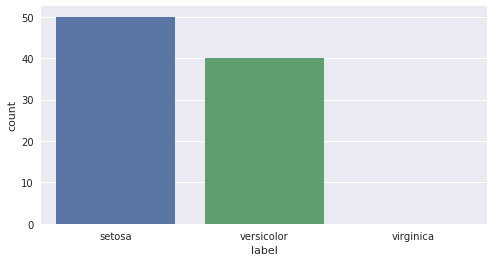

In [71]:
gSingleBarplot(irisTraining, "label")

No hace falta más, está claro que al separar los conjuntos de entrenamiento y test hemos eliminado todas las instancias de la clase **virginica**, es por ello que hemos sesgado completamente el aprendizaje de nuestros modelos de clasificación.

Es la primera lección del preprocesado, *nunca asumir nada sobre el estado de los datos*. En nuestro caso, el problema es tan sencillo como que las instancias están ordenadas conforme a sus clases, primero las 50 instancias de **setosa**, luego las 50 de **versicolor**, así que antes de realizar ninguna operación sobre el conjunto de datos es razonable aplicar una **aleatorización** de los valores:

In [81]:
# We can randomize an index by permuting its values with numpy
np.random.permutation([1,2,3,4,5,6,7])

array([7, 1, 4, 6, 5, 3, 2])

In [82]:

# Supose a percentaje of training/test data
trainingSize = 0.6

# Compute the partition size
cutIndex = ceil(len(df) * trainingSize)

# Randomize the dataset by using random permutation of its index
randomIndex = np.random.permutation( df.index )
irispermdf = df.reindex( randomIndex )

# We divide the dataset into two subsets by index:
irisTraining = irispermdf.iloc[0:cutIndex-1]
irisTest = irispermdf.iloc[cutIndex:]


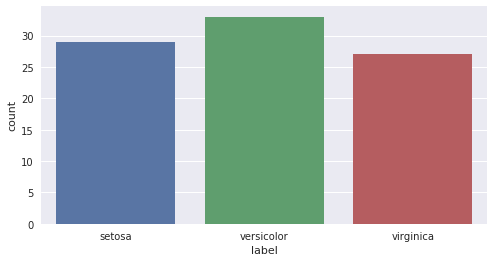

In [83]:
gSingleBarplot(irisTraining, "label")

Si ahora observamos el resultado veremos que hay más uniformidad en las instancias. **Probad a ejecutar el código anterior y a generar la gráfica varias veces**. Veréis que el resultado varia cada vez, esto es porque estamos utilizando una función aleatoria sin semilla y por ello nunca obtendremos el mismo resultado.

Esta propiedad es indeseable en muchas ocasiones, ya que muchas veces querremos ser capaces de **reproducir** nuestros resultados. Para ello ajustaremos una semilla para la librería numpy con la función `np.random.seed`

In [ ]:
# En vuestros experimentos usad siempre una semilla, si no nunca los podreis recuperar
seed=6342
np.random.seed(6342)

---
**Palabra clave** Decimos que un experimento es **reproducible** cuando podemos repetirlo en las mismas condiciones un número indeterminado de veces. Es muy importante tener esto en cuenta para que nuestros resultados no sean fruto del azar y puedan ser contrastados por otros profesionales.

---

Incluid el código de la semilla antes de llamar a cualquier función que dependa de **np.random**. Ahora volved a ejecutar el código varias veces para comprobar que el resultado ya no varia cada vez que lo ejecutamos. 

**NOTA** Es muy recomendable fijar una semilla al principio de una libreta para asegurar que siempre obtendremos los mismo resultados. Como estamos en un entorno interactivo es muy probable que ejecutemos cada celda varias veces, esto puede llevar a resultados que no son reproducibles. Antes de entregar una práctica es recomendable reiniciar la libreta y ejecutar todo de manera secuencial una única vez, para asegurarnos de los resultados que obtendremos.

#### Estratificación (primera prueba con scikit-learn)

Hay una última consideración a tener en cuenta a la hora de separar los datos en training y test. Muchas veces, aleatorizar los datos no es suficiente, ya que de este modo no garantizamos **preservar las distribuciones de las variables**, y en casos complejos podemos estar eliminando gran cantidad de información.

Es por ello que para garantizar dicha distribución solemos utilizar una técnica denominada **estratificación**. Con esta técnica garantizamos que para cada partición mantenemos una proporción de ejemplos de cada clase estable. Esto es aun más importante cuando nuestros datos están **desbalanceados**, es decir, tenemos un número de ejemplos distintos para cada clase.

Para aplicar estratificación, utilizaremos una función de particionado de los datos de scikit-learn.


Como veremos más adelante scikit separa siempre los atributos de la variable clase en todas sus operaciones, así que debemos acostumbrarnos a dividir las columnas de nuestro dataset:

In [ ]:
# We must always divide our dataset into attributes and label
attributesdf = df.drop('label', 1)
labeldf = df['label']

Ahora cargamos y usamos la función `train_test_split` de scikit-learn para generar nuestras particiones. Esta función nos devolverá 4 particiones, correspondientes al entrenamiento y test para atributos y clase:

In [ ]:
from sklearn.model_selection import train_test_split
train_atts, test_atts, train_label, test_label = train_test_split( 
    attributesdf, # Dataset con los atributos
    labeldf, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=labeldf) # Variable a estratificar

Ahora podemos regenerar nuestros datatasets completos para usarlos con nuestros clasificadores custom, ZeroR y OneR. Para ello simplemente concatenaremos los datasets de atributos y de clase.

In [ ]:
irisTraining = train_atts.assign(label = train_label)
irisTest = test_atts.assign(label = test_label)

Si repetimos la gráfica anterior, veremos que ahora nuestra partición de entrenamiento conserva la proporcion orginal entre las clases.

In [ ]:
gSingleBarplot(irisTraining, "label")

------------

Ahora repetiremos el experimento anterior para ver si los resultados son más razonables:

**ZeroR**:

In [ ]:
(tab, accuracy) = trainAndEvalClassifier(trainZeroR, irisTraining, irisTest)

In [ ]:
tab

In [ ]:
print("Accuracy:", accuracy)

**OneR**

In [ ]:
(tab, accuracy) = trainAndEvalClassifier(trainOneR, irisTraining, irisTest, nbins=len(df.label.unique()))

In [ ]:
tab

In [ ]:
print("Accuracy:", accuracy)

------
Parece que los resultados usando el holdout correctamente son mucho más razonables y un poco peores que entrenando y testeando con todo el conjunto de datos.

**Como sugerencia**, probad a modificar el porcentaje de entrenamiento/test en el proceso de holdout y observad el cambio en el resultado de la clasificación.

---
## 5 .- Clasificación con scikit-learn

Ahora que ya hemos jugado con nuestros propios clasificadores, es hora de probar un método más competitivo y utilizar el paquete **scikit-learn**.

Concretamente utilizaremos un árbol de decisión, solo arañaremos el potencial de la librería en esta práctica. En las siguientes sesiones nos centraremos en como usar y ajustar este tipo de modelos.

Para lanzar el algoritmo debemos cargar la librería y usar las funciones correspondientes:

In [ ]:
from sklearn import tree
# Init the model (set hyperparameters)
model = tree.DecisionTreeClassifier(random_state=seed)

Para entrenar un modelo de sklearn, tenemos que pasarle por separado los atributos y la clase. Para ello creamos las siguientes estructuras:

In [ ]:
features = irisTraining.drop('label',1)
labels = irisTraining['label']

Para entrenar un clasificador usaremos la función **fit**:

In [ ]:
# Use fit to learn from a configured model
classifier = model.fit(features, labels)

Para evaluar nuevas instancias utilizaremos el modelo aprendido junto a la función predict. Es muy importante que quitemos la información de la clase del dataset de test antes de evaluarlo.

In [ ]:
testFeatures = irisTest.drop('label',1)
prediction = classifier.predict(testFeatures)

Una vez hayamos obtenido nuestro vector de predicciones, podemos calcular la matriz de confusión y las tasa de acierto:

In [ ]:
pd.crosstab(irisTest['label'], prediction)

In [ ]:
comparison = irisTest[irisTest['label'] == prediction]
accuracy = len(comparison) / len(irisTest)
print("Accuracy:", accuracy)

**Conclusión**: No parece que el dataset iris sea muy complejo, ya que un clasificador OneR y un árbol de decisión no se llevan mucho... No obstante, como veremos en la segunda parte de la práctica esto no siempre es así.

**Pregunta avanzada:** ¿En este caso, cuál es el parecido entre un árbol de decisión y el algoritmo OneR?

---
## 6 .- Preprocesamiento de datos

### Tratamiento de valores perdidos

En muchos casos tendremos casos en nuestro dataset en los que alguna variable no está observada, esto se denomina **casos perdidos**. La mayor parte de los algoritmos de clasificación no son capaces de tratar con este fenómeno, es por ello que en muchos casos debemos preprocesar el conjunto de datos antes de empezar a trabajar con él.

Existen diversas técnicas para eliminar los valores perdidos:

* Podemos sencillamente eliminar los casos completos que contengan algún valor perdido. Esta es una decisión drástica y solo puede llevarse a cabo cuando se trate de un porcentaje muy pequeño de la base datos. Aun así podríamos estar perdiendo información.
* Podemos rellenar (imputar) los valores perdidos con algún valor concreto. En muchos casos se suelen utilizar estadísticos como la media o la moda, pero también es muy común definir técnicas más complejas que se basan en predecir los valores perdidos construyendo un modelo con respecto al resto de los datos (interpolación, regresión o métodos Bayesianos).

Vamos a prácticas algunas técnicas sobre el conjunto de datos iris, que como no tiene datos perdidos, hemos de introducirlos artificialmente.

In [1]:
missingDf = df.copy()

label = missingDf['label']
attributes = missingDf.drop('label', 1)

import random
ix = [(row, col) for row in range(attributes.shape[0]) for col in range(attributes.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    missingDf.iat[row, col] = np.nan

NameError: name 'df' is not defined

In [ ]:
missingDf.sample(10)

Vereis que aparecen algunos valores como `NaN`, es decir que no conocemos su valor. Para saber cuantos valores perdidos tiene cada variable podemos usar `describe` y fijarnos en el atributo count:

In [ ]:
missingDf.describe()

Compararemos el total con el tamaño del dataframe:

In [ ]:
len(df)

### Tratamiento de valores perdidos: Eliminación

Lo más inmediato sería eliminar bien los **ejemplos** que contengan valores perdidos o bien los **Atributos**, no obstante hay que tener cuidado ya que es probable que perdamos demasiados datos y nos quedemos sin suficientes recursos para aprender y evaluar nuestros modelos.

Para eliminar los valores perdidos usamos la función `dropna(axis=n)` que elimina los valores perdidos por filas (`axis = 0`) o por columnas (`axis = 1`)

In [ ]:
# By Row:
cleanDf = missingDf.dropna(axis=0)
cleanDf.sample(10)

Vereis que nos hemos quedado casi sin filas:

In [ ]:
len(cleanDf)

In [ ]:
# By Column:
cleanDf = missingDf.dropna(axis=1)
cleanDf.sample(10)

Ahora nos hemos quedado sin atributos!

###  Insertando valores perdidos



Otra estrategia más sofisticada consiste en introducir valores concretos en lugar de los valores perdidos.

Para ello utilizaremos la función `fillna(...)` que nos permite rellenar los valores usando un valor escalar o un vector u objecto de tipo `Series`(el vector de pandas)

In [ ]:
# Lets just insert 20 into sepal length...
cleanDf = missingDf.fillna(value={"sepal_length": 20})

Esto obviamente no es muy util ya que estaremos sesgando los datos enormemente:

In [ ]:
gMultipleHistogram(cleanDf)

Lo mejor sería usar un valor para cada columna, en este caso por ejemplo podemos usar la media:

In [ ]:
# Calculamos el vector de medias
meansValues = df.mean()

# Ahora lo usamos para rellenar:
cleanDf = missingDf.fillna( meansValues )

In [ ]:
gMultipleHistogram(cleanDf)

Ahora observamos que hemos sesgado la tendencia central de las variables, lo que tampoco garantiza que vaya a mejorar la clasificación. Esto es solo un ejemplo, pero podemos inventarnos todo tipo de filtros para usar mediante `fillna`. Como hemos introducido anteriormente, solemos utilizar algún tipo de predictor estadístico para imputar valores, pero esto queda fuera del alcance de la asignatura.

###  Valores perdidos intrínsecos

Muchas veces los valores perdidos no vendrán indicados como `NaN`o `NA` sino que vendrán codificados como `0`o agún código que representará ruido en nuestros datos. Algo como `-9999999`o incluso peor. En estos casos es importante determinar si los valores atípicos que estamos observando se deben a errores de medición o valores perdidos o son parte de la variable. Es muy útil en estos casos hacer referencia al contenido semántico de la variable, por ejemplo, si la variable es *edad*, entenderemos que un valor de `-1` o de `1000` se trata de un error y por tanto podemos tomarlo como valor perdido.

---
## Trabajo a entregar

El trabajo a entregar para esta práctica será un informe reproduciendo el estudio que hemos hecho com el dataset iris para dos bases de datos de la literatura muy famosas. Las tenéis disponibles en campus virtual junto con las páginas oficiales del repositorio de datos original, donde podréis encontrar información sobre el significado semántico del problema.

Se trata de las bases de datos `pima_diabetes`y `wisconsin`, ambas codifican problemas de clasificación binarios en el ámbito de la medicina.

Debéis crear **una** única libreta en donde exploraréis las bases de datos, las preprocesaréis y aprenderéis los modelos vistos para después realizar un proceso de clasificación e interpretarlo.

Los siguientes items deben estar presentes en la libreta:

* Análisis exploratorio mediante gráficas y estadísticos. Interpretación de las distribuciones de las variables más relevantes y su relación con la clase. Identificación de anomalías y tratamiento de datos perdidos si los hubiese.
* Aprendizaje y evaluación de un clasificador zeroR.
* Aprendizaje y evaluación de un clasificador oneR.
* Aprendizaje y evaluación de un árbol de decisión.
* Los tres apartados anteriores deberán realizarme mediante proceso holdout balanceado y se deberán discutir los resultados y comparar los tres algoritmos entre sí, identificando las diferencias principales entre las matrices de confusión y el accuracy.

Es muy **importante** que tengáis en cuenta los siguientes criterios de evaluación:

* Deberán haberse realizado todos los puntos anteriores.
* Deberá ser capaz de explicar coherentemente los resultados, utilizando siempre que se pueda un vocabulario técnico (usad las palabras clave).
* El código deberá ser claro y bien documentado
* Las explicaciones deberán ser claras y el documento estár bien estructurado (titutlos, subtitulos, indice, parrafos...)
* El codigo debe ser reproducible y reusable, se penalizará enormente el copiar y pegar secciones enteras.

Como véis hay 5 puntos de evaluación, que supondrán la valoración **media** de la práctica. Ya sabéis que la media es un estadístico que se ve afectado enormemente por los valores extremos, así que aunque el contenido sea correcto, si no explica bien en la entrevista o no está presentable y profesional...

In [ ]:
np.array([10,9,9,1,1]).mean()